See [Create Your Own Active Matter Simulation (With Python)](https://medium.com/swlh/create-your-own-active-matter-kjsimulation-with-python-76fce4a53b6f) by Philip Mocz.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
class Swarm:
    
    def __init__(self, N, L):
        self._L = L
        self._x = np.random.uniform(low=0.0, high=L, size=(N, ))
        self._y = np.random.uniform(low=0.0, high=L, size=(N, ))
        self._theta = np.random.uniform(low=0.0, high=2*np.pi, size=(N,))
    
    @property
    def N(self):
        return len(self._x)

    @property
    def x(self):
        return self._x.copy()
    
    @property
    def y(self):
        return self._y.copy()
    
    @property
    def theta(self):
        return self._theta.copy()
    
    def move(self, v0, R, eta):
        new_theta = np.zeros(self.N)
        for i in range(self.N):
            nr_neighbours = 0
            for j in range(self.N):
                if (self._x[i] - self._x[j])**2 + (self._y[i] - self._y[j])**2 < R**2:
                    new_theta[i] += self._theta[j]
                    nr_neighbours += 1
            new_theta[i] /= nr_neighbours
            self._x[i] += v0*np.cos(self._theta[i])
            self._y[i] += v0*np.sin(self._theta[i])
        self._theta = new_theta + np.random.uniform(-0.5*eta, 0.5*eta, size=(self.N,))            

In [12]:
def plot_swarm(swarm):
    plt.plot(swarm.x, swarm.y, '.')

In [10]:
swarm = Swarm(10, 1.0)

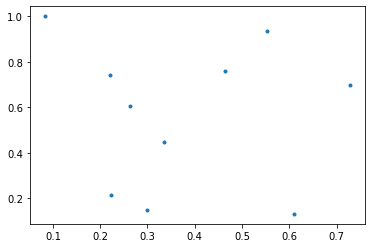

In [13]:
plot_swarm(swarm)